In [82]:
#Started with Sam's code, but added cleancities csv

import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
import time
from config import (gkey)
import gmaps
import requests
from us import states
import censusgeocode

cleancities = "../Project1/cleaned_cities_states.csv"

In [83]:
url = "https://jobs.github.com/positions.json?"
page = "page="
page_num = "0"
df_1 = []
df_2 = []
l = []

In [84]:
i = 1

while i < 20:
    
    f = (url + page + str(i))
    res = requests.get(f)
    res_json = res.json()

    res_vol = len(res_json)
    
    if (res_vol > 3):
        l = l + res_json
        print(f"Completed API call number {i}")
    else:
        print(f"res was smaller than 3 so we are going to stop the loop and .")
        print(f"final length of response {len(l)}")
        #l = json.dumps(l)
        #print(f"final length of response after jsondumps {len(l)}")
        #print(f"~~~~~~~~~~~~~~~~~~~~")
        break
    
    i += 1

Completed API call number 1
Completed API call number 2
Completed API call number 3
Completed API call number 4
Completed API call number 5
Completed API call number 6
res was smaller than 3 so we are going to stop the loop and .
final length of response 293


In [85]:
data = pd.DataFrame(l)
data.drop(['how_to_apply', 'company_logo', 'company_url', ], axis=1)

,company,created_at,description,id,location,title,type,url
0,American Physical Society,Wed Aug 07 19:54:07 UTC 2019,<p>Who we are</p>\n<p>The American Physical So...,5ceb7560-3be5-446d-a878-1482a7ff0728,Ridge,Software Developer,Full Time,https://jobs.github.com/positions/5ceb7560-3be...
1,AppraisalFlo,Tue Oct 22 18:47:36 UTC 2019,<p>Who we are:</p>\n<p>We represent a business...,3fa12a8e-a0ae-46d1-9601-b78d41e43737,Atlanta,Senior PHP | MySQL Developer | Remote,Full Time,https://jobs.github.com/positions/3fa12a8e-a0a...
2,Farm Journal,Tue Oct 22 17:42:36 UTC 2019,<p><strong>POSITION DESCRIPTION</strong></p>\n...,740ce758-53cc-4f3d-88b9-80aaa92e2105,Chicago,Software Developer,Full Time,https://jobs.github.com/positions/740ce758-53c...
3,Nexient,Tue Oct 22 13:52:28 UTC 2019,<p>All of us rely on software in some form in ...,9e0464b0-a58c-4f37-864f-f8e3fdb8bf6d,"Dublin, Ohio, United States, 43016",Salesforce Technical Architect,Full Time,https://jobs.github.com/positions/9e0464b0-a58...
4,PlusServer GmbH,Tue Oct 22 08:26:13 UTC 2019,<p>Wir bieten die Sicherheit eines Konzerns mi...,2ffe2180-1bf6-4e3f-b7da-f45fd719cbcb,Köln,Java Entwickler Front- und Backend,Full Time,https://jobs.github.com/positions/2ffe2180-1bf...
5,Softbrik,Tue Oct 22 08:13:53 UTC 2019,<p><strong>Job description</strong></p>\n<p>Lo...,008ab00a-89bb-4541-98e8-e7b85ffa6035,remote,Frontend developer,Full Time,https://jobs.github.com/positions/008ab00a-89b...
6,LeapYear,Thu Sep 19 21:48:28 UTC 2019,<h2>What we do</h2>\n<p>LeapYear's secure mach...,092c5660-bd5c-484f-96fe-0d9796e87031,San Francisco,Haskell Engineer at LeapYear - Core Platform,Full Time,https://jobs.github.com/positions/092c5660-bd5...
7,Datadog,Mon Oct 21 21:12:11 UTC 2019,<p>Have you been writing beautiful web UIs for...,b3704276-7ed7-4880-8d45-f35052964659,NewYork,Software Engineer- Frontend,Full Time,https://jobs.github.com/positions/b3704276-7ed...
8,Abt Associates,Mon Oct 21 18:28:48 UTC 2019,<p><strong>Opportunity</strong></p>\n<p>Abt As...,a71fdb23-3447-4b5f-8fca-db08a774e48b,"Cambridge, MA",Senior Application Developer,Full Time,https://jobs.github.com/positions/a71fdb23-344...
9,Sertifi,Mon Oct 21 18:25:41 UTC 2019,<p>Sertifi offers an Agreement Platform built ...,df2d1d3f-4408-45ca-b586-3f07eb24e0e6,Chicago,Senior Software Developer,Full Time,https://jobs.github.com/positions/df2d1d3f-440...


In [86]:
clean_location = pd.read_csv(cleancities)
data2 = pd.merge(data, clean_location, on='id')
data2.drop(['company_logo', 'company_url', 'how_to_apply', 'location_x', 'url', 'location_y'], axis=1)
df2 = pd.DataFrame(data2)
data2

,company,company_logo,company_url,created_at,description,how_to_apply,id,location_x,title,type,url,location_y,Remote,City,County,State,Country
0,Datadog,https://jobs.github.com/rails/active_storage/b...,http:,Mon Oct 21 21:12:11 UTC 2019,<p>Have you been writing beautiful web UIs for...,"<p><a href=""https://grnh.se/f0a956961"">https:/...",b3704276-7ed7-4880-8d45-f35052964659,NewYork,Software Engineer- Frontend,Full Time,https://jobs.github.com/positions/b3704276-7ed...,"New York, New York, United States",NaN,New York,New York,NY,United States
1,Abt Associates,https://jobs.github.com/rails/active_storage/b...,https://www.abtassociates.com/,Mon Oct 21 18:28:48 UTC 2019,<p><strong>Opportunity</strong></p>\n<p>Abt As...,"<p>Apply online here:\n<a href=""https://career...",a71fdb23-3447-4b5f-8fca-db08a774e48b,"Cambridge, MA",Senior Application Developer,Full Time,https://jobs.github.com/positions/a71fdb23-344...,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States
2,Sertifi,None,https://corp.sertifi.com/,Mon Oct 21 18:25:41 UTC 2019,<p>Sertifi offers an Agreement Platform built ...,"<p><a href=""https://sertifi.applytojob.com/app...",df2d1d3f-4408-45ca-b586-3f07eb24e0e6,Chicago,Senior Software Developer,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
3,wrnch,https://jobs.github.com/rails/active_storage/b...,https://wrnch.ai/,Mon Oct 21 14:31:18 UTC 2019,<p>wrnch is one of Canada’s first profitable A...,<p>Please apply via our website -&gt; <a href=...,9dde244a-f5b9-458d-b99b-7cfa19cfa798,Montreal,Senior Software Developer,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada
4,Shell,https://jobs.github.com/rails/active_storage/b...,http://www.shell.com,Mon Oct 21 12:46:24 UTC 2019,<p><strong>Job Description</strong></p>\n<p><s...,"<p><a href=""https://shellinternational.redirec...",36b9af5b-fcc0-457d-b7f3-efc61625bbdb,London,Scrum Master - Agile Hub,Full Time,https://jobs.github.com/positions/36b9af5b-fcc...,"London, , United Kingdom",NaN,London,NaN,NaN,United Kingdom
5,Shell,https://jobs.github.com/rails/active_storage/b...,http://www.shell.com,Mon Oct 21 09:43:20 UTC 2019,<p><strong>Job Description</strong></p>\n<p><s...,"<p><a href=""https://shellinternational.redirec...",aa48ee67-6f39-47ae-b1d0-0bcabcbfac6f,London,DevOps Engineer,Full Time,https://jobs.github.com/positions/aa48ee67-6f3...,"London, , United Kingdom",NaN,London,NaN,NaN,United Kingdom
6,AJ Madison,https://jobs.github.com/rails/active_storage/b...,http://www.ajmadison.com/,Mon Oct 21 08:14:49 UTC 2019,<p><strong>Senior Full Stack Engineer</strong>...,<p><strong>Interested?</strong>\nYou can apply...,d81e897e-0bc7-4013-81b9-85c35cb96f57,"Brooklyn, United States",Senior Full Stack Engineer,Full Time,https://jobs.github.com/positions/d81e897e-0bc...,"Brooklyn, NY, United States",NaN,Brooklyn,Kings,NY,United States
7,Casechek,https://jobs.github.com/rails/active_storage/b...,https://www.casechek.com/,Fri Oct 18 19:00:54 UTC 2019,<p>COMPANY OVERVIEW</p>\n<p>Casechek is the in...,"<p>Email your resume to <a href=""mailto:career...",1e457e27-8d08-4205-bbc8-e5c4ef1f23f6,Chicago,Senior Software Engineer,Full Time,https://jobs.github.com/positions/1e457e27-8d0...,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
8,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/BASFSE,Fri Oct 18 15:07:46 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,"<p><a href=""https://basfse.redirect.your-jobre...",25f23b53-161e-4dcb-9c21-a0131784412d,Ludwigshafen,IT-Architekt_in in der Digitalisierung (m/w/d),Full Time,https://jobs.github.com/positions/25f23b53-161...,"Ludwigshafen, , Germany",NaN,Ludwigshafen,NaN,NaN,Germany
9,BASF SE,https://jobs.github.com/rails/active_storage/b...,http://on.basf.com/meinekarriere,Fri Oct 18 13:59:49 UTC 2019,<p><strong>Einsatzgebiet:</strong> IT / Inform...,"<p><a h

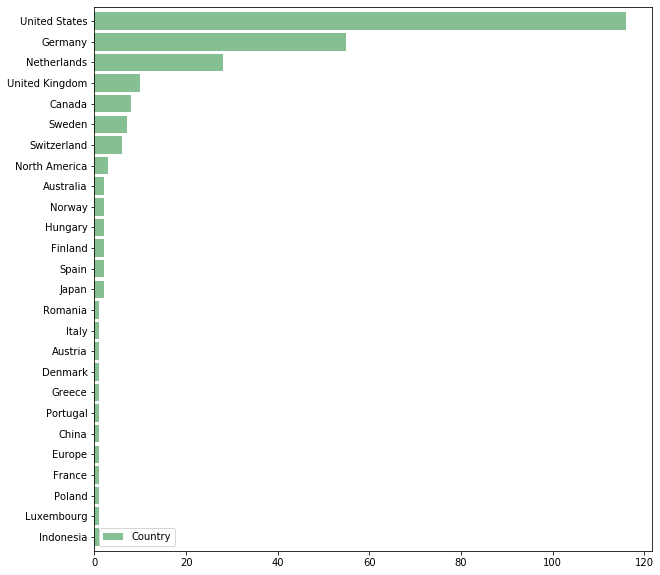

In [88]:
country = data2['Country'].value_counts()
country_df = pd.DataFrame(country)
country_df.plot(kind='barh', figsize=(10,10), color='#86bf91', zorder=2, width=0.85).invert_yaxis()
plt.savefig("../Project1/country_hbar.png")

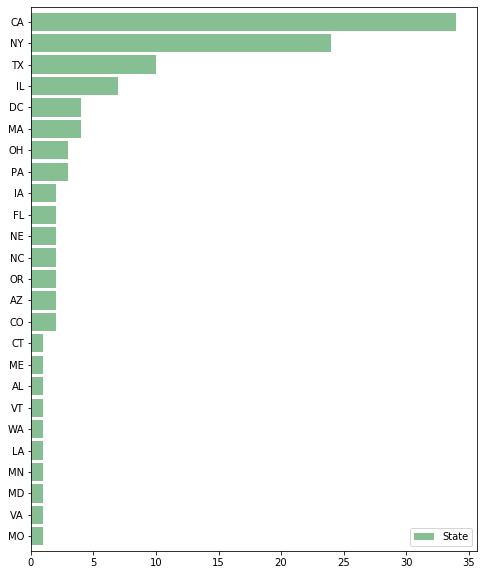

In [87]:
state = data2['State'].value_counts()
state_df = pd.DataFrame(state)
state_df.plot(kind='barh', figsize=(8,10), color='#86bf91', zorder=2, width=0.85).invert_yaxis()
plt.savefig("../Project1/state_hbar.png")

In [48]:
#data2['Today'] = 'Tue Oct 22 23:59:59 UTC 2019'

#d1 = pd.to_datetime(data2['Today'], '%m/%d/%Y')
#d2 = pd.to_datetime(data2['created_at', '%m/%d/%Y'])

#def days_between(d1, d2):
#    entered = datetime.strptime(d1, "%Y-%m-%d")
#    today = datetime.strptime(d2, "%Y-%m-%d"))
#    return abs((today - entered).days)

#def days_between(d1, d2):
#    entered = d1.strftime("%Y-%m-%d")
#    today = d2.strftime("%Y-%m-%d")
#    return abs((today - entered).days)


In [162]:
data2['Today'] = '10/22/19'
data2.rename(columns={'created_at':'Entered'}, inplace=True)
time_df = pd.DataFrame(data2, columns=['Entered', 'Today'])

time_df['Entered Month'] = time_df['Entered'].str[4:7]
time_df['Entered Day'] = time_df['Entered'].str[8:10]
time_df['Entered Year'] = time_df['Entered'].str[-2:]

time_df['Entered Month']=time_df['Entered Month'].replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                                          'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'})

time_df['Entered On'] = time_df.pop('Entered Month')+'/'+time_df.pop('Entered Day')+'/'+time_df.pop('Entered Year')

#time_df['Age'] = time_df['Today']-time_df['Entered On']
time_df['Entered On']=pd.to_datetime(time_df['Entered On'])
time_df['Today']=pd.to_datetime(time_df['Today'])
time_df['Age'] = (time_df['Today']-time_df['Entered On']).dt.days
min = time_df['Age'].min()
max = time_df['Age'].max()
median = time_df['Age'].median()
mode = time_df['Age'].mode()
mean = time_df['Age'].mean()

time_df.describe()

,Age
count,286.000000
mean,174.933566
std,164.097700
min,1.000000
25%,18.000000
50%,57.000000
75%,348.750000
max,366.000000
